In [28]:
from dlc_practical_prologue import generate_pair_sets

nSamples = 1000
data = generate_pair_sets(nSamples)
var_names = ["train_input", "train_target", "train_classes", "test_input", "test_target", "test_classes"]
train_input, train_target, train_classes, test_input, test_target, test_classes = data
stringWidth = 20
for i, el in enumerate(list(map(lambda x: (x.shape, x.dtype), data))):
    print('{:s}  {:s}  {:s}'.format(
        var_names[i].ljust(stringWidth),
        ' x '.join(list(map(lambda x: str(x), list(el[0])))).center(stringWidth), 
        'dtype'.ljust(stringWidth)))

train_input            1000 x 2 x 14 x 14   dtype               
train_target                  1000          dtype               
train_classes               1000 x 2        dtype               
test_input             1000 x 2 x 14 x 14   dtype               
test_target                   1000          dtype               
test_classes                1000 x 2        dtype               


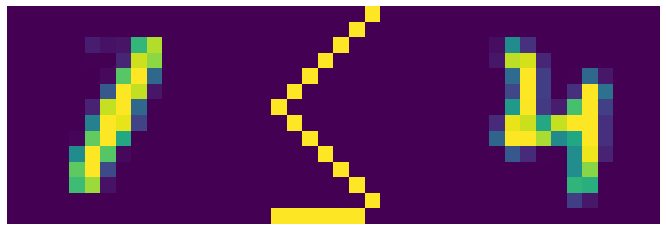

In [29]:
from utils import show_pair

show_pair(train_input, train_target, 0)

## Without using the information from the classes

In [30]:
from utils import train_model
from models.net1 import Net1
import torch
import torch.nn as nn

model = Net1(50)
criterion = nn.BCEWithLogitsLoss()
eta = 1e-3
mini_batch_size = 100
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model(model, train_input, train_target.float(), test_input, test_target, nb_epochs, mini_batch_size, optimizer, criterion)

Epoch 0: loss 7.010 / train accuracy 76.7%, test accuracy 75.4
Epoch 1: loss 4.450 / train accuracy 82.4%, test accuracy 78.2
Epoch 2: loss 3.610 / train accuracy 84.9%, test accuracy 80.5
Epoch 3: loss 2.871 / train accuracy 90.3%, test accuracy 82.0
Epoch 4: loss 2.393 / train accuracy 92.4%, test accuracy 83.0
Epoch 5: loss 1.874 / train accuracy 95.1%, test accuracy 83.8
Epoch 6: loss 1.359 / train accuracy 96.4%, test accuracy 82.7
Epoch 7: loss 0.925 / train accuracy 97.0%, test accuracy 82.0
Epoch 8: loss 0.783 / train accuracy 97.0%, test accuracy 81.8
Epoch 9: loss 0.841 / train accuracy 97.0%, test accuracy 80.6


In [32]:
nParams = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('The model has {:d} trainable parameters'.format(nParams))

The model has 29789 trainable parameters


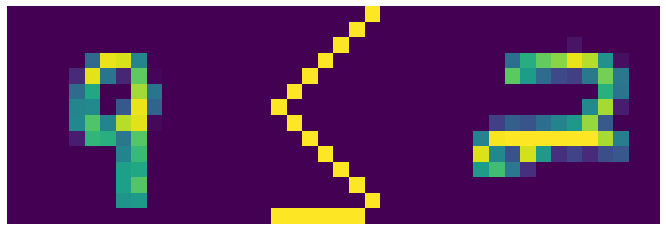

In [33]:
predictions = model(test_input)
show_pair(test_input, predictions, 10)

## With class information during training

In [34]:
from utils import train_model_double_objective
from models.net2 import Net2

model = Net2(50)
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 334.146 / train accuracy 78.1%, test accuracy 77.8
Epoch 1: loss 136.891 / train accuracy 83.8%, test accuracy 81.2
Epoch 2: loss 94.228 / train accuracy 84.6%, test accuracy 85.8
Epoch 3: loss 71.190 / train accuracy 88.3%, test accuracy 85.1
Epoch 4: loss 58.713 / train accuracy 89.5%, test accuracy 87.7
Epoch 5: loss 47.105 / train accuracy 89.6%, test accuracy 86.9
Epoch 6: loss 42.606 / train accuracy 91.5%, test accuracy 87.1
Epoch 7: loss 43.334 / train accuracy 92.3%, test accuracy 86.8
Epoch 8: loss 40.676 / train accuracy 92.1%, test accuracy 88.5
Epoch 9: loss 35.483 / train accuracy 94.4%, test accuracy 87.6


In [35]:
from utils import accuracy_of_digit_class
print("Accuracy: {:.2f}".format(accuracy_of_digit_class(model, test_input, test_classes)))

Accuracy: 93.00


In [36]:
from models.digit_classifier import DigitClassifier
import torch
from torch import nn
from utils import train_model

mini_batch_size = 100
model = DigitClassifier(10)

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()
train_in = train_input[:, 0, :, :].unsqueeze(axis = 1)
train_class = train_classes[:,0]

train_model(model = model, train_input = train_in,
            train_target = train_class, test_input = None, test_target = None,
            nb_epochs = 20, mini_batch_size = 100, optimizer = optimizer, criterion = criterion, verbose = False)

# calculate accuracy
test_in = test_input[:, 0, :, :].unsqueeze(axis = 1)

nb_errors = 0
model.eval()
for b in range(0, test_in.size(0), 100):
    input_ = test_in.narrow(0, b, mini_batch_size)
    output = model(input_)
    _, pred = torch.max(output, dim=1)
    gt = test_classes[:,0].narrow(0, b, mini_batch_size)
    nb_errors += (pred != gt).sum().item()
N = test_input.shape[0]
print("Accuracy: {:.2f}".format(100*(N-nb_errors)/N))

Accuracy: 91.70
